Transformation is required to have global minimum and low euclidean distance

1.In linear regression- global minima

2.Eucleadian distance KNN,Hirearichal Clustering

In Deep Learning

1.ANN- Global minima

2.CNN- 0-255 pixels

3.RNN- LSTM 


## Types of Transformation
1. Normalization and Standardization
2. Min-Max
3. Median and Quantiles (0,25,50,100)
4. Gaussian Transformation 
5. Logarithmic 
6. Reciprocal
7. Square Root 
8. Exponential
9. Box Cox 

# Standardization


  variables in the same range with mean =0 and std =1
  formaula=(x-x_mean)/std

In [1]:
import pandas as pd
import numpy as np


In [5]:
df=pd.read_csv('Data/titanic.csv',usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [6]:
df.isnull().sum()


Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [7]:
df['Age']=df['Age'].fillna(df['Age'].mode()[0])
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [10]:
# Standard Scaler from sklearn
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [13]:
pd.DataFrame(df_scaled,columns=['Survived','Pclass','Age','Fare'])

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.497793,-0.502445
1,1.266990,-1.566107,0.715048,0.786845
2,1.266990,0.827377,-0.194583,-0.488854
3,1.266990,-1.566107,0.487640,0.420730
4,-0.789272,0.827377,0.487640,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.118780,-0.386671
887,1.266990,-1.566107,-0.725201,-0.044381
888,-0.789272,0.827377,-0.346188,-0.176263
889,1.266990,-1.566107,-0.194583,-0.044381


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline



(array([1., 2., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([-0.78927234, -0.62760738, -0.46594242, -0.30427746, -0.1426125 ,
         0.01905245,  0.18071741,  0.34238237,  0.50404733,  0.66571229,
         0.82737724]),
 <BarContainer object of 10 artists>)

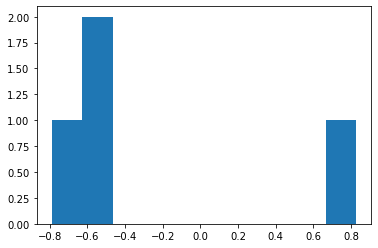

In [17]:
plt.hist(df_scaled[0])


(array([1., 0., 0., 0., 0., 0., 0., 2., 0., 1.]),
 array([-1.56610693, -1.28279725, -0.99948758, -0.71617791, -0.43286823,
        -0.14955856,  0.13375111,  0.41706078,  0.70037046,  0.98368013,
         1.2669898 ]),
 <BarContainer object of 10 artists>)

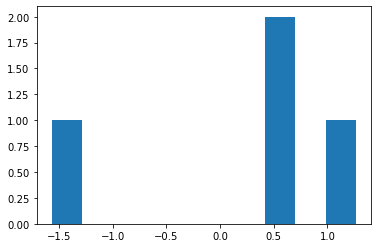

In [19]:
plt.hist(df_scaled[3])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

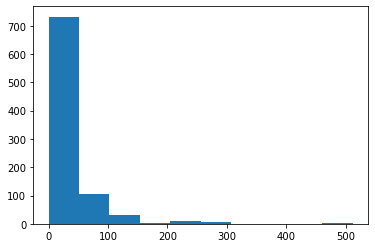

In [20]:
plt.hist(df['Fare'])

# Min max Scaling 0 -1

formula=X-Xmin/(X_max-X_min)

In [22]:
from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler()
df_min_max=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_min_max.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([ 54.,  46., 354., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

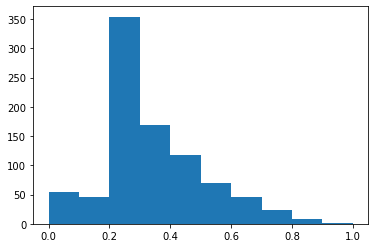

In [24]:
plt.hist(df_min_max['Age'])

# Robust Scaler
  median and quantiles
  IQR=75%-25%
  formula =(x-median)/IQR
  
  
  More Robust way for outlier 

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()


In [25]:
df_robust=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust.head()

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.497793,-0.502445
1,1.266990,-1.566107,0.715048,0.786845
2,1.266990,0.827377,-0.194583,-0.488854
3,1.266990,-1.566107,0.487640,0.420730
4,-0.789272,0.827377,0.487640,-0.486337


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([-0.64842165,  0.38313716,  1.41469598,  2.4462548 ,  3.47781362,
         4.50937244,  5.54093125,  6.57249007,  7.60404889,  8.63560771,
         9.66716653]),
 <BarContainer object of 10 artists>)

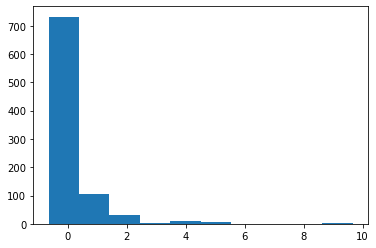

In [26]:
plt.hist(df_robust['Fare'])

(array([ 54.,  46., 354., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([-2.13361302, -1.53037606, -0.9271391 , -0.32390214,  0.27933482,
         0.88257178,  1.48580873,  2.08904569,  2.69228265,  3.29551961,
         3.89875657]),
 <BarContainer object of 10 artists>)

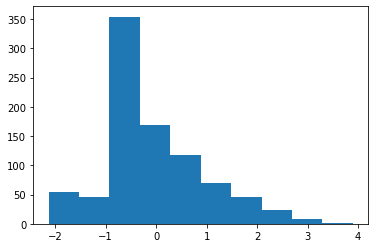

In [27]:
plt.hist(df_robust['Age'])

# Gaussian  Transformation
1 . Accuracy
2 . Performance


In [33]:
# Check normal ditribution
## Q-Q plot
import scipy.stats as stat
import pylab
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

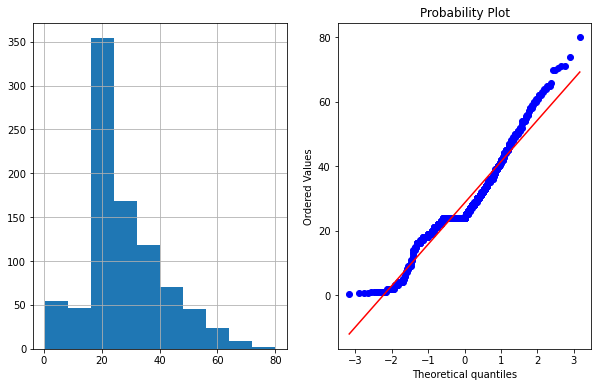

In [34]:
plot_data(df,'Age')

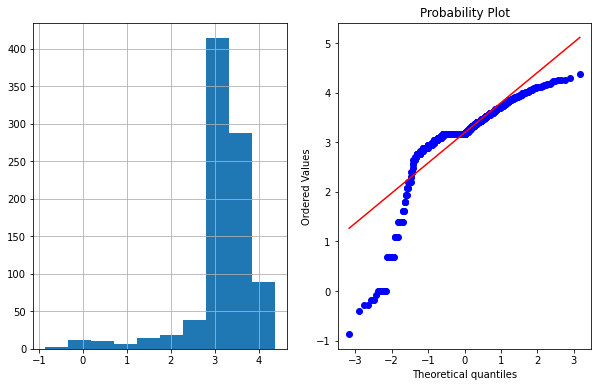

In [35]:
### logarithmic Transformation
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

In [ ]:
## It makes a left Skewed 

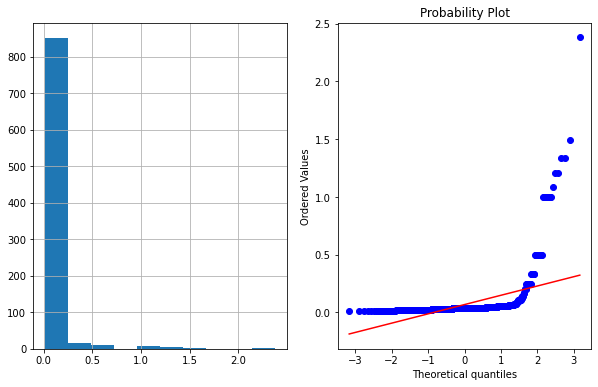

In [36]:
# Reciprocal Transformation

df['Age_r']=1/df['Age']
plot_data(df,'Age_r')

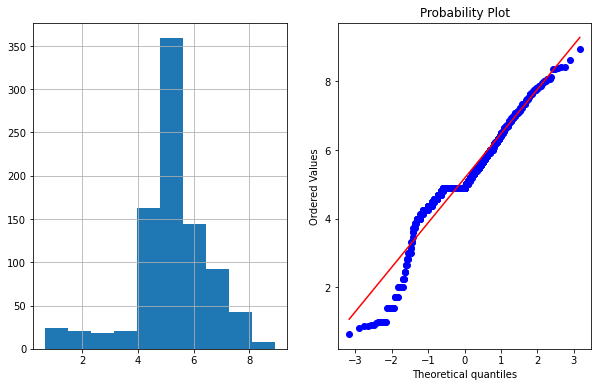

In [37]:
# Square root Transformation

df['age_sqrt']=np.sqrt(df.Age)
plot_data(df,'age_sqrt')

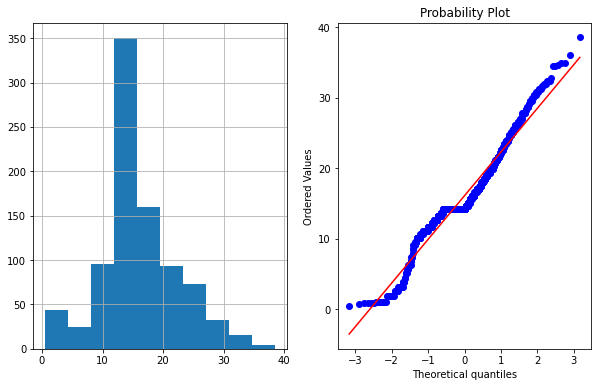

In [39]:
# exponential Transformation

df['Age_exp']=df.Age**(1/1.2)
plot_data(df,'Age_exp')

In [41]:
# Boxcox Transformation
df['Age_Box'],param=stat.boxcox(df.Age)

In [42]:
df.Age_Box

0      11.726247
1      18.153237
2      13.426140
3      17.014818
4      17.014818
         ...    
886    13.839763
887    10.396146
888    12.585746
889    13.426140
890    15.849770
Name: Age_Box, Length: 891, dtype: float64

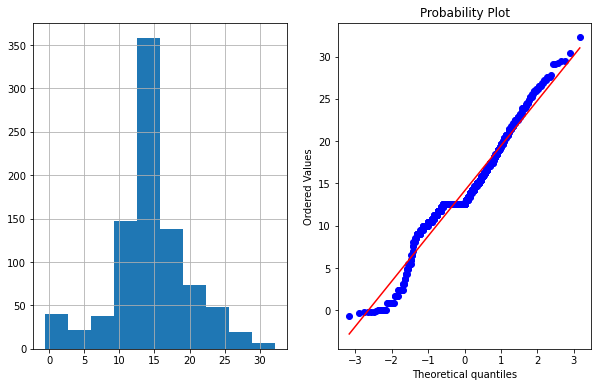

In [43]:
plot_data(df,'Age_Box')